# SVM Kernel Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Outer Circle
# Generating x values for corresponding y values for the upper half of the circle
x = np.linspace(-5.0, 5, 100)

# Computing y value from the equation of the circle x^2 + y^2 = r^2 --> y = sqrt( r^2 - x^2) 
# Here, radius of circle is 10.
y = np.sqrt(10**2 - x**2)

#-y gives the negative of the upper half (i.e., the bottom half of the circle).
#np.hstack([y, -y]) stacks these two arrays together: [y_upper, y_lower].
y = np.hstack([y, -y])

#Similarly, -x is the mirror of the original x values.
# Expand x values symmetrically to match the full circle formed by y.
x = np.hstack([x,-x])

In [4]:
# Inner Circle
x1 = np.linspace(-5.0, 5, 100)
y1 = np.sqrt(5**2 - x**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([-x,x])

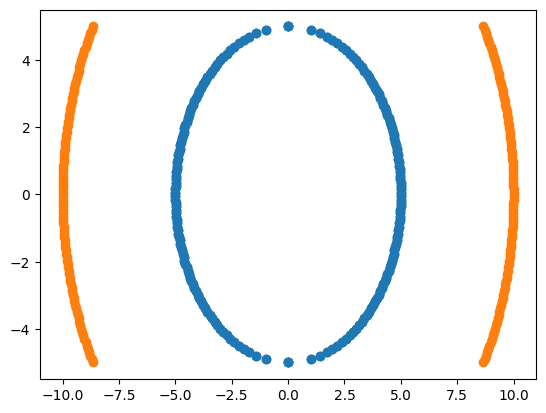

In [5]:
plt.scatter(y1,x1)
plt.scatter(y,x)

In [6]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [7]:
# Seperating the dependent and independent feature
X = df.iloc[:,:2]
y = df.Y

In [8]:
# Train test split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We are using polynomial kernel for this model

In [9]:
# We need to finf the components for the polunomial kernel
# We will use the following formula to calculate the components
# k(x, y) = (c + x^T y)^d
# where c is a constant, d is the degree of the polynomial, and x and y are the features 

df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1 * X2'] = (df['X1'] * df['X2'])
df.head()

,X1,X2,Y,X1_square,X2_square,X1 * X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [10]:
# Update the independent feature and dependent feature
X = df[['X1','X2','X1_square','X2_square','X1 * X2']]
y = df['Y']

In [11]:
# Agian train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train

,X1,X2,X1_square,X2_square,X1 * X2
108,-9.078976,4.191919,82.427813,17.572187,-38.058336
272,4.453618,-2.272727,19.834711,5.165289,-10.121858
599,-0.000000,-5.000000,0.000000,25.000000,0.000000
479,-4.015072,2.979798,16.120804,8.879196,-11.964104
436,-4.810457,-1.363636,23.140496,1.859504,6.559714
...,...,...,...,...,...
71,9.761334,2.171717,95.283645,4.716355,21.198857
106,-8.982945,4.393939,80.693297,19.306703,-39.470515
270,4.551063,-2.070707,20.712172,4.287828,-9.423918
435,-4.780671,-1.464646,22.854811,2.145189,7.001992


In [ ]:
#import plotly.io as pio
#pio.renderers.default = 'vscode'

import plotly.express as px
fig = px.scatter_3d(df, x='X1', y="X2", z='X1 * X2', color="Y")
fig.show()

# here, we can see that the data points are not linearly seperated.

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1_square', y="X2_square", z='X1 * X2', color="Y")
fig.show()

# After applying polynomial kernel , we are completely able to differentiate the datapoints and can use the 
# linear kernel to find the hyperplane and make predictions.

In [ ]:
# Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#print("Pridected values are : {}".format(y_pred))
print(f"Accuracy score : {accuracy_score(y_test,y_pred)}")

Pridected values are : [0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1]
Accuracy score : 1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#print("Pridected values are : {}".format(y_pred))
print(f"Accuracy score : {accuracy_score(y_test,y_pred)}")

# the accuracy_score when done the transformation manually and using polynomial kernel directly is same.

Accuracy score : 1.0


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#print("Pridected values are : {}".format(y_pred))
print(f"Accuracy score : {accuracy_score(y_test,y_pred)}")

Accuracy score : 0.3611111111111111


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#print("Pridected values are : {}".format(y_pred))
print(f"Accuracy score : {accuracy_score(y_test,y_pred)}")

Accuracy score : 1.0
